In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('..\data\watermelon.csv',header=None)
data=data.values

In [3]:
class DBSCAN():
    def __init__(self,epsilon,MinPts):
        self.epsilon=epsilon
        self.MinPts=MinPts
        ###距离矩阵
        self.dist=0
        ###所有簇集合
        self.k_clusters=[]
        ###核心点
        self.CorePts=np.array([],dtype=int)
        ###当前样本
        self.Samples=0
        ###当前簇
        self.clusters=0
    
    ###用来一直往下找核心点
    def findDensity(self,point):
        ###将该核心点从核心点集合去掉
        self.CorePts=np.setdiff1d(self.CorePts,point)
        ###找到该核心点的密度直达点，与样本取交集，即防止点被重复聚类
        densityPts=np.where((self.dist[int(point)]<self.epsilon)==True)[0]
        densityPts=np.intersect1d(densityPts,self.Samples)
        ###找到密度直达点中的核心点
        IntersecCorePts=np.intersect1d(self.CorePts,densityPts)
        ###将这些点添加进目前的簇
        self.clusters=np.append(self.clusters,densityPts)
        self.clusters=np.unique(self.clusters)
        ###将这些点从样本中移除
        self.Samples=np.setdiff1d(self.Samples,self.clusters)
        ###从该点邻域的核心点出发，只要还能找得到核心点，就一直往下找
        if len(IntersecCorePts)!=0:
            for IntersecCore in IntersecCorePts:
                self.findDensity(IntersecCore)
        return self.clusters
    
    def fit(self,data):
        m=data.shape[0]
        self.dist=np.zeros((m,m))
        self.Samples=np.arange(m)
        for datum,idx in zip(data,range(m)):
            self.dist[idx]=np.sqrt(np.sum(np.square(datum-data),axis=1))
            ###加入核心点
            if (np.sum(self.dist[idx]<=self.epsilon)) >= self.MinPts:
                self.CorePts=np.append(self.CorePts,idx)
        ###只要核心点集合不为空，一直找
        while(len(self.CorePts)!=0):
            self.clusters=np.array([],dtype=int)
            c=self.findDensity(np.random.choice(self.CorePts))
            self.k_clusters.append(c)
        return self.k_clusters        

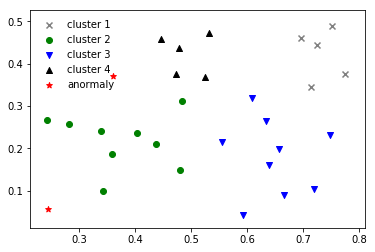

In [4]:
model=DBSCAN(0.11,5)
k_clusters=model.fit(data)

plt.scatter(data[k_clusters[0]][:,0],data[k_clusters[0]][:,1],marker='x',color='gray',label='cluster 1')
plt.scatter(data[k_clusters[1]][:,0],data[k_clusters[1]][:,1],marker='o',color='green',label='cluster 2')   
plt.scatter(data[k_clusters[2]][:,0],data[k_clusters[2]][:,1],marker='v',color='blue',label='cluster 3')
plt.scatter(data[k_clusters[3]][:,0],data[k_clusters[3]][:,1],marker='^',color='black',label='cluster 4')

plt.scatter(data[10][0],data[10][1],marker='*',color='red',label='anormaly')
plt.scatter(data[14][0],data[14][1],marker='*',color='red')
plt.legend(frameon=False)

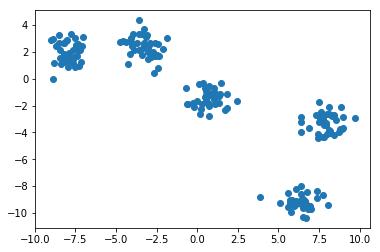

In [5]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=200,centers=5,cluster_std=.7,random_state=6)
plt.scatter(X[:,0],X[:,1])

In [6]:
model1=DBSCAN(0.75,5)
cluster=model1.fit(X)

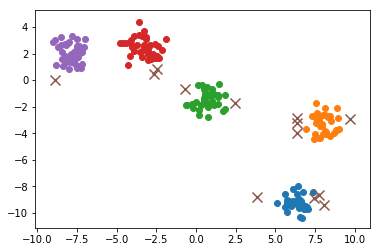

In [7]:
sk_clusters=np.array([],dtype=int)
for i in range(5):
    sk_clusters=np.append(sk_clusters,cluster[i])
anomoly_point=np.setdiff1d(np.arange(200),sk_clusters)
for i in range(5):
    plt.scatter(X[cluster[i]][:,0],X[cluster[i]][:,1])
plt.scatter(X[anomoly_point][:,0],X[anomoly_point][:,1],marker='x',s=100)